<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Neural_networks/Basic/Spiral4torch_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spiral data distribution for pytorch neuron

In [5]:
import torch
import numpy as np

from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split

In [4]:
np.random.seed(42)

Let's create a synthetic dataset of 3 classes, with two parameter columns and 300 obsetvations. Balanced classes with 100 samples each.

In [20]:
def create_spiral(samples_num = 100, parameters_num = 2, classes_num = 3):

  X = np.zeros((samples_num * classes_num, parameters_num))
  y = np.zeros((samples_num * classes_num), dtype = 'uint8')

  for i in range(classes_num):
    class_indices = range(samples_num * i, samples_num * (i+1))
    radius = np.linspace(0.0, 1, samples_num)
    angle = np.linspace(i*4, (i+1)*4, samples_num) + np.random.rand(samples_num) * 0.2  #theta
    X[class_indices] = np.c_[radius * np.sin(angle), radius * np.cos(angle)]
    y[class_indices] = i

  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=42)
  
  X_train = torch.Tensor(X_train)
  X_test = torch.Tensor(X_test)
  y_train = torch.Tensor(y_train).to(torch.int64)
  y_test = torch.Tensor(y_test).to(torch.int64) 
  
  return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = create_spiral()

Train size:  torch.Size([240, 2]) torch.Size([240])
Test size:  torch.Size([60, 2]) torch.Size([60])


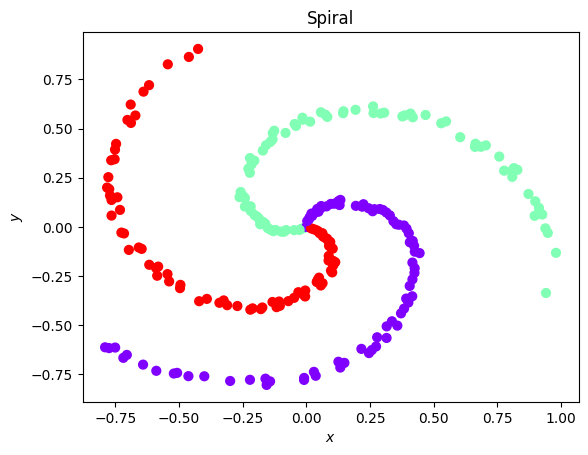

In [32]:
print('Train size: ', X_train.shape, y_train.shape)
print('Test size: ', X_test.shape, y_test.shape)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.rainbow)
plt.title('Spiral')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()